# Template: Find the minimum of a function f(x)

### The model should automatically set the optimal learning rate gamma




### Find the minimum of 
## $$f(x) = x^4+200*(x+2000)^2+10000 $$  <br><br><br>

## Type your code in cells 3, 5, 6 and 8
### to generate the results in cell 7 and 9 

In [30]:
#import python packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
#define the x's range for plotting
x=np.arange(-120, 80, 0.1)


In [32]:
#define f(x) based on the function 
def f(x): 
    
    ########################################
    #### Type your code after "return"
    return x**4+200*(x+2000)**2+10000

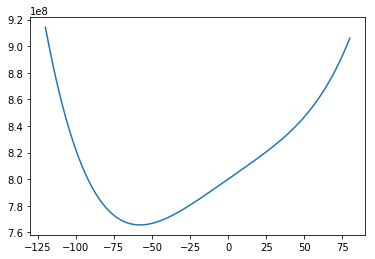

In [33]:
#plot x vs. f(x)
plt.plot(x,f(x))

### We can see that the minimun is between f(-50) and f(-100)

In [34]:
#define the derivative of f(x) over x ---> f'(x)
def derivative(x):
    ########################################
    #### Type your code after "return"
    return 4*x**3+400*(x+2000)
    

In [35]:
#define a function to find the minimum of f(x) 
def find_optimum(x_old,x_new,gamma,precisions):
    #store each update in x_search
    x_search = [x_new]

    
    #keep searchhing until the values converge within the precision
    
    ########################################
    #### Type your code after "whhile"
    while abs(x_new-x_old) > precisions :
        
        #use x_old to keep the x value before the update
        x_old = x_new       
        #update x_new
        x_new = x_old - gamma* derivative(x_old)               
        #record the udpates
        x_search.append(x_new)
    
    #print out the result and plot the decreasing trend of f(x) vs iternations
    #print(x_search)
    #print(len(x_search), " iterations")
    #print("The local minimum occurs at %f" %x_new)
    plt.plot([f(x) for x in x_search])
    

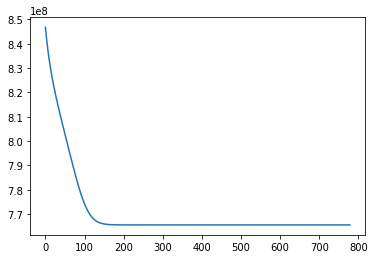

In [36]:
#Test the find_optimum() function with the following parameters


x_old = 70 # This value doesn't matter, it's just a init value
x_new = 50 # This value doesn't matter
gamma = 0.000001  #the learning rate is critial, but we have to guess a value now
precision = 1e-12 #the precision decides when to stop the search
find_optimum(x_old,x_new,gamma,precision)  #call the function 

###################################################
#the results should be similar to what's shown below
###################################################

In [37]:
#create a find_optimum function to automatically set gamma based on 
#t is the decrease rate of gamma

def adaptive_optimum(x_old, x_new, gamma, t, precision):
    
    #nextIter is the flag for continuing or stopping the loop
    nextIter = True
    
    #keep searching until nextIter is set to false
    while nextIter:
        
        #decrease the value of gamma in each iteration
        gamma *=t
        
        #create a local copy of x_old and x_new in each iteration
        #it's because we can want any change to x_new and x_old to 
        #affect the calculation in the next iternation 
        x_old_try = x_old 
        x_new_try = x_new 
        
        #try 10000 times to see if x converges
        for i in range(10000):
            #use x_old_try to keep the value of x before the update
            x_old_try = x_new_try          
            
            try:
                ####################################################
                ######type your code here (multiple lines)##########
                ###### update x_new_try and compare the change 
                ###### with the precision 
                ###### print the "Found gamma: " and gamma value
                ###### if the update is within the precision 
                ###### stop the loop and return to function call 
                ####################################################
                x_new_try = x_old_try - gamma* derivative(x_old_try)  
                if abs(x_new_try-x_old_try) < precision :
                    nextIter = False
                    print("Found gamma: ",gamma)
                    print("The minimum is at  :",x_new_try)
                    print("The minimum of f(x) is : ",f(x_new_try))
                    return
                                 
            # if there is an error, such as "value too large" error, stop the
            # iternation and try next gamma
            except:                          
                break 
            

In [38]:
#Idealy, we want to automatically find the right gamma
#read http://www.onmyphd.com/?p=gradient.descent
#use backtracking method and create t

x_old = 70 # This value does not matter 
x_new = 50 # This value does not matter either

#the precision is set to be very high
precision = 1e-12

#decrease rate of gamma
t=0.9

#we can start with a large positive gamma close to 1
gamma = 1

#call the function
adaptive_optimum(x_old, x_new, gamma, t, precision)

#hints
#1. We can simply create a list of gamma and try them because f(x) 
    #may increase too fast and generate "value too large" error
#2. Use try and exception to eleminate the gamma that create errors
#3. Set a fixed number of updates, say 10000. See if updates converge into precision

####################################################
# the output should show the best gamma found
# and the minimum f(x) value and the corresponding x 
#####################################################

Found gamma:  4.4981962247603756e-05
The minimum is at  : -57.91038100742448
The minimum of f(x) is :  765599132.6183875
